In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

import tensorflow as tf
from tensorflow.keras.applications import VGG19

In [4]:
model = VGG19(
    include_top = False,
    weights = 'imagenet'
)

model.trainable = False
model.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,024,384 (76.39 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 20,024,384 (76.39 MB)

In [5]:
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def load_and_process_image(image_path):
    img = load_img(image_path)
    img = img_to_array(img)
    img = preprocess_input(img)
    img = np.expand_dims(img, axis = 0)
    return img

In [7]:
def deprocess(x):
    # perform the inverse of the preprocessiing step
    x[:, :, 0] += 103.939
    x[:, :, 1] += 116.779
    x[:, :, 2] += 123.68
    x = x[:, :, ::-1]

    x = np.clip(x, 0, 255).astype('uint8')
    return x

def display_image(image):
    if len(image.shape) == 4:
        img = np.squeeze(image, axis = 0)

    img = deprocess(img)

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    return

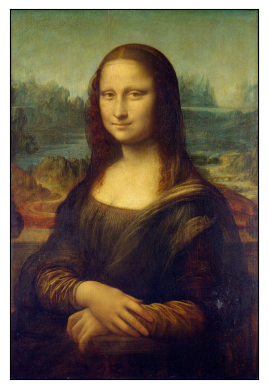

In [21]:
img = load_and_process_image('/content/drive/MyDrive/Colab Notebooks/qwetyuiop/Mona_Lisa,_by_Leonardo_da_Vinci,_from_C2RMF_retouched.jpg')
display_image(img)

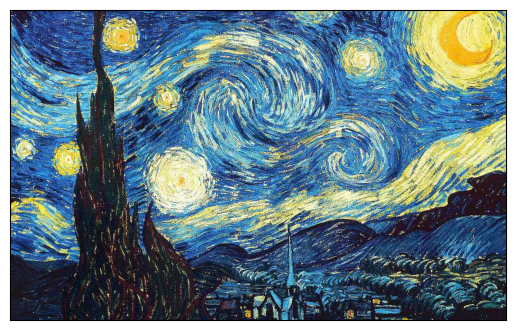

In [26]:
img = load_and_process_image('/content/drive/MyDrive/Colab Notebooks/qwetyuiop/starry_night.jpg') # Replace 'my_image.jpg' with your actual image file name
display_image(img)

In [27]:
style_layers = [
    'block1_conv1',
    'block3_conv1',
    'block5_conv1'
]

content_layer = 'block5_conv2'

# intermediate models
content_model = Model(
    inputs = model.input,
    outputs = model.get_layer(content_layer).output
)

style_models = [Model(inputs = model.input,
                      outputs = model.get_layer(layer).output) for layer in style_layers]

In [28]:
# Content Cost
def content_cost(content, generated):
    a_C = content_model(content)
    a_G = content_model(generated)
    cost = tf.reduce_mean(tf.square(a_C - a_G))
    return cost

In [29]:
def gram_matrix(A):
    channels = int(A.shape[-1])
    a = tf.reshape(A, [-1, channels])
    n = tf.shape(a)[0]
    gram = tf.matmul(a, a, transpose_a = True)
    return gram / tf.cast(n, tf.float32)

In [13]:
lam = 1. / len(style_models)

def style_cost(style, generated):
    J_style = 0

    for style_model in style_models:
        a_S = style_model(style)
        a_G = style_model(generated)
        GS = gram_matrix(a_S)
        GG = gram_matrix(a_G)
        current_cost = tf.reduce_mean(tf.square(GS - GG))
        J_style += current_cost * lam

    return J_style

In [30]:
import time
import tensorflow as tf  # Add this import

generated_images = []

def training_loop(content_path, style_path, iterations=20, a=10., b=20.):
    # Initialise
    content = load_and_process_image(content_path)
    style = load_and_process_image(style_path)
    generated = tf.Variable(content, dtype=tf.float32)

    opt = tf.optimizers.Adam(learning_rate=7.0)

    best_cost = float('inf')
    best_image = None

    start_time = time.time()

    for i in range(iterations):
        with tf.GradientTape() as tape:
            tape.watch(generated)  # Ensure gradients track changes to generated
            J_content = content_cost(content, generated)
            J_style = style_cost(style, generated)
            J_total = a * J_content + b * J_style  # Ensure J_content and J_style are scalars

        grads = tape.gradient(J_total, generated)
        # Fix: Pass generated directly instead of wrapping it in a list
        opt.apply_gradients([(grads, generated)])

        if J_total < best_cost:
            best_cost = J_total
            best_image = generated.numpy()

        if i % (iterations // 10) == 0:
            time_taken = time.time() - start_time
            print(f'Cost at iteration {i}: {J_total.numpy():.4f}. Time elapsed: {time_taken:.2f}s')
            generated_images.append(generated.numpy())

    return best_image

In [32]:
final = training_loop('/content/drive/MyDrive/Colab Notebooks/qwetyuiop/Mona_Lisa,_by_Leonardo_da_Vinci,_from_C2RMF_retouched.jpg','/content/drive/MyDrive/Colab Notebooks/qwetyuiop/starry_night.jpg')

Cost at iteration 0: 31153991680.0000. Time elapsed: 15.07s
Cost at iteration 2: 11824368640.0000. Time elapsed: 20.04s
Cost at iteration 4: 8596540416.0000. Time elapsed: 25.03s
Cost at iteration 6: 4455911936.0000. Time elapsed: 30.25s
Cost at iteration 8: 3467960576.0000. Time elapsed: 35.18s
Cost at iteration 10: 2946735616.0000. Time elapsed: 40.09s
Cost at iteration 12: 2481463552.0000. Time elapsed: 44.98s
Cost at iteration 14: 1824031232.0000. Time elapsed: 49.85s
Cost at iteration 16: 1422483328.0000. Time elapsed: 54.70s
Cost at iteration 18: 1129189760.0000. Time elapsed: 59.55s


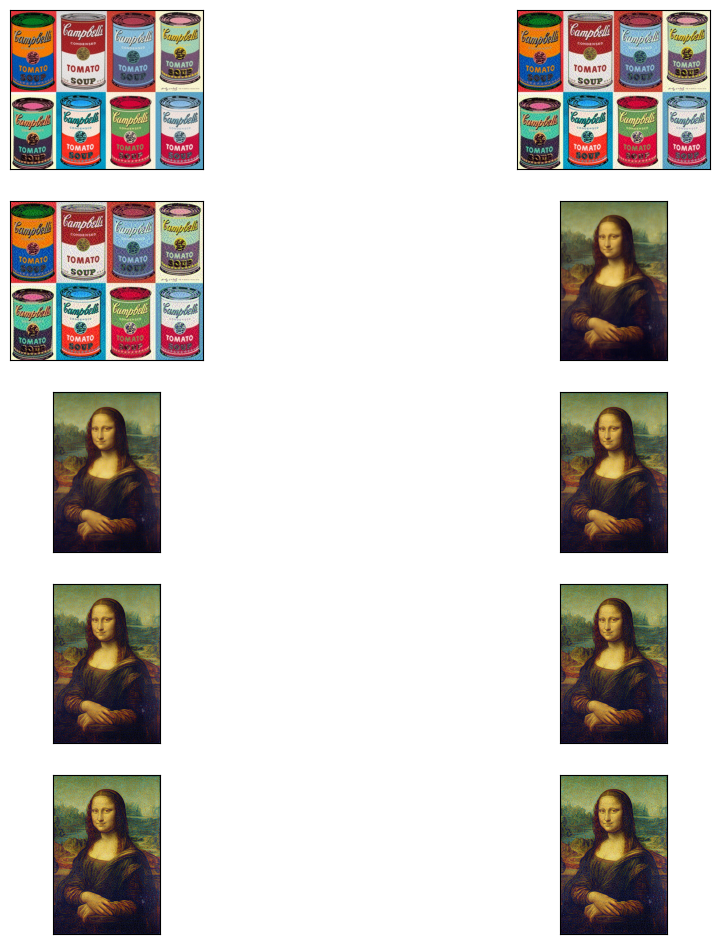

In [33]:
plt.figure(figsize = (12, 12))

for i in range(10):
    plt.subplot(5, 2, i + 1)
    display_image(generated_images[i])
plt.show()

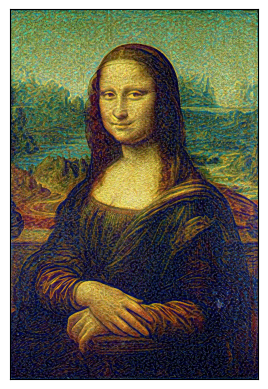

In [34]:
display_image(final)